Training data shape: (60000, 28, 28)
Validation data shape: (10000, 28, 28)
Data type: uint8
Min pixel value: 0
Max pixel value: 255


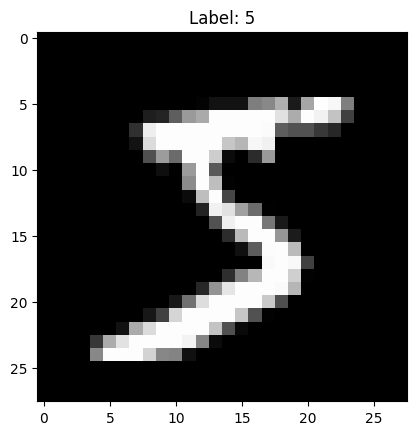

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9057 - loss: 0.3082 - val_accuracy: 0.9704 - val_loss: 0.0989
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9745 - loss: 0.0786 - val_accuracy: 0.9735 - val_loss: 0.0814
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9830 - loss: 0.0516 - val_accuracy: 0.9767 - val_loss: 0.0866
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9867 - loss: 0.0426 - val_accuracy: 0.9768 - val_loss: 0.0891
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9714 - val_loss: 0.1065
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9917 - loss: 0.0268 - val_accuracy: 0.9775 - val_loss: 0.0874
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9807 - val_loss: 0.0802
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9941 - loss: 0

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

# Inspect shapes and data types
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Validation data shape:", x_valid.shape)  # (10000, 28, 28)
print("Data type:", x_train.dtype)  # uint8
print("Min pixel value:", x_train.min())  # 0
print("Max pixel value:", x_train.max())  # 255

# Display the first image
image = x_train[0]
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Reshape the data to 1D vectors
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# Convert labels to one-hot encoded vectors
num_categories = 10
y_train = to_categorical(y_train, num_categories)
y_valid = to_categorical(y_valid, num_categories)

# Build the model
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Model summary
model.summary()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_valid, y_valid),
    verbose=1
)
